In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.   Load and Inspect Data:**

In [97]:
!unzip "/content/drive/MyDrive/GENAI/Week2/Day4/world happiness.zip"

Archive:  /content/drive/MyDrive/GENAI/Week2/Day4/world happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [143]:
import pandas as pd

In [144]:
file_2015 = pd.read_csv("/content/2019.csv")
df = pd.DataFrame(file_2015)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [145]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB




# **2.   Data Preprocessing:**



In [147]:
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [148]:
numerical_cols = df.select_dtypes(include='number').columns

outliers = pd.DataFrame()

for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outliers = pd.concat([outliers, outlier])

In [149]:
outliers = outliers.drop_duplicates()
outliers

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [150]:
df_cleaned = df.drop(outliers.index)
df_cleaned

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093
12,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278
...,...,...,...,...,...,...,...,...,...
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147


In [151]:
df2 = df_cleaned.copy()

In [152]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Country or region'] = le.fit_transform(df2['Country or region'])
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,4,48,7.494,1.380,1.624,1.026,0.591,0.354,0.118
9,10,4,7.246,1.376,1.475,1.016,0.532,0.244,0.226
11,12,26,7.167,1.034,1.441,0.963,0.558,0.144,0.093
12,13,52,7.139,1.276,1.455,1.029,0.371,0.261,0.082
14,15,125,7.054,1.333,1.538,0.996,0.450,0.348,0.278


In [153]:
df2.max()

,0
Overall rank,156.000
Country or region,133.000
Score,7.494
GDP per capita,1.684
Social support,1.624
Healthy life expectancy,1.088
Freedom to make life choices,0.631
Generosity,0.419
Perceptions of corruption,0.278


In [154]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2["Score"] = scaler.fit_transform(df2[["Score"]])

In [155]:
df2["GDP per capita"] = scaler.fit_transform(df2[["GDP per capita"]])
df2["Social support"] = scaler.fit_transform(df2[["Social support"]])
df2["Healthy life expectancy"] = scaler.fit_transform(df2[["Healthy life expectancy"]])
df2["Freedom to make life choices"] = scaler.fit_transform(df2[["Freedom to make life choices"]])
df2["Generosity"] = scaler.fit_transform(df2[["Generosity"]])
df2["Perceptions of corruption"] = scaler.fit_transform(df2[["Perceptions of corruption"]])

In [156]:
df2.max()

,0
Overall rank,156.0
Country or region,133.0
Score,1.0
GDP per capita,1.0
Social support,1.0
Healthy life expectancy,1.0
Freedom to make life choices,1.0
Generosity,1.0
Perceptions of corruption,1.0




# **3.   Social Support and Happiness:**



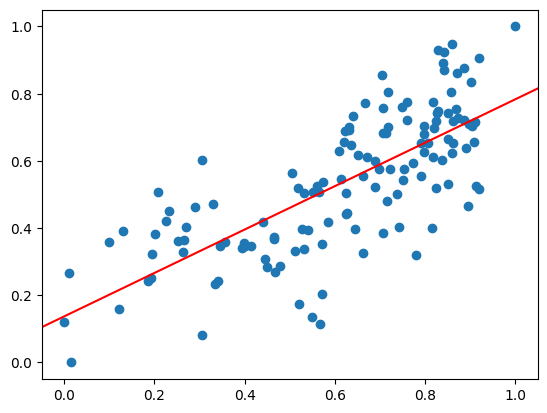

In [157]:
import matplotlib.pyplot as plt
import numpy as np

m, b = np.polyfit(df2["Social support"], df2["Score"], 1)
plt.axline(xy1=(0,b), slope = m, color = "red")
plt.scatter(df2["Social support"], df2["Score"])



# **4.  Regional Comparisons of GDP and Health:**




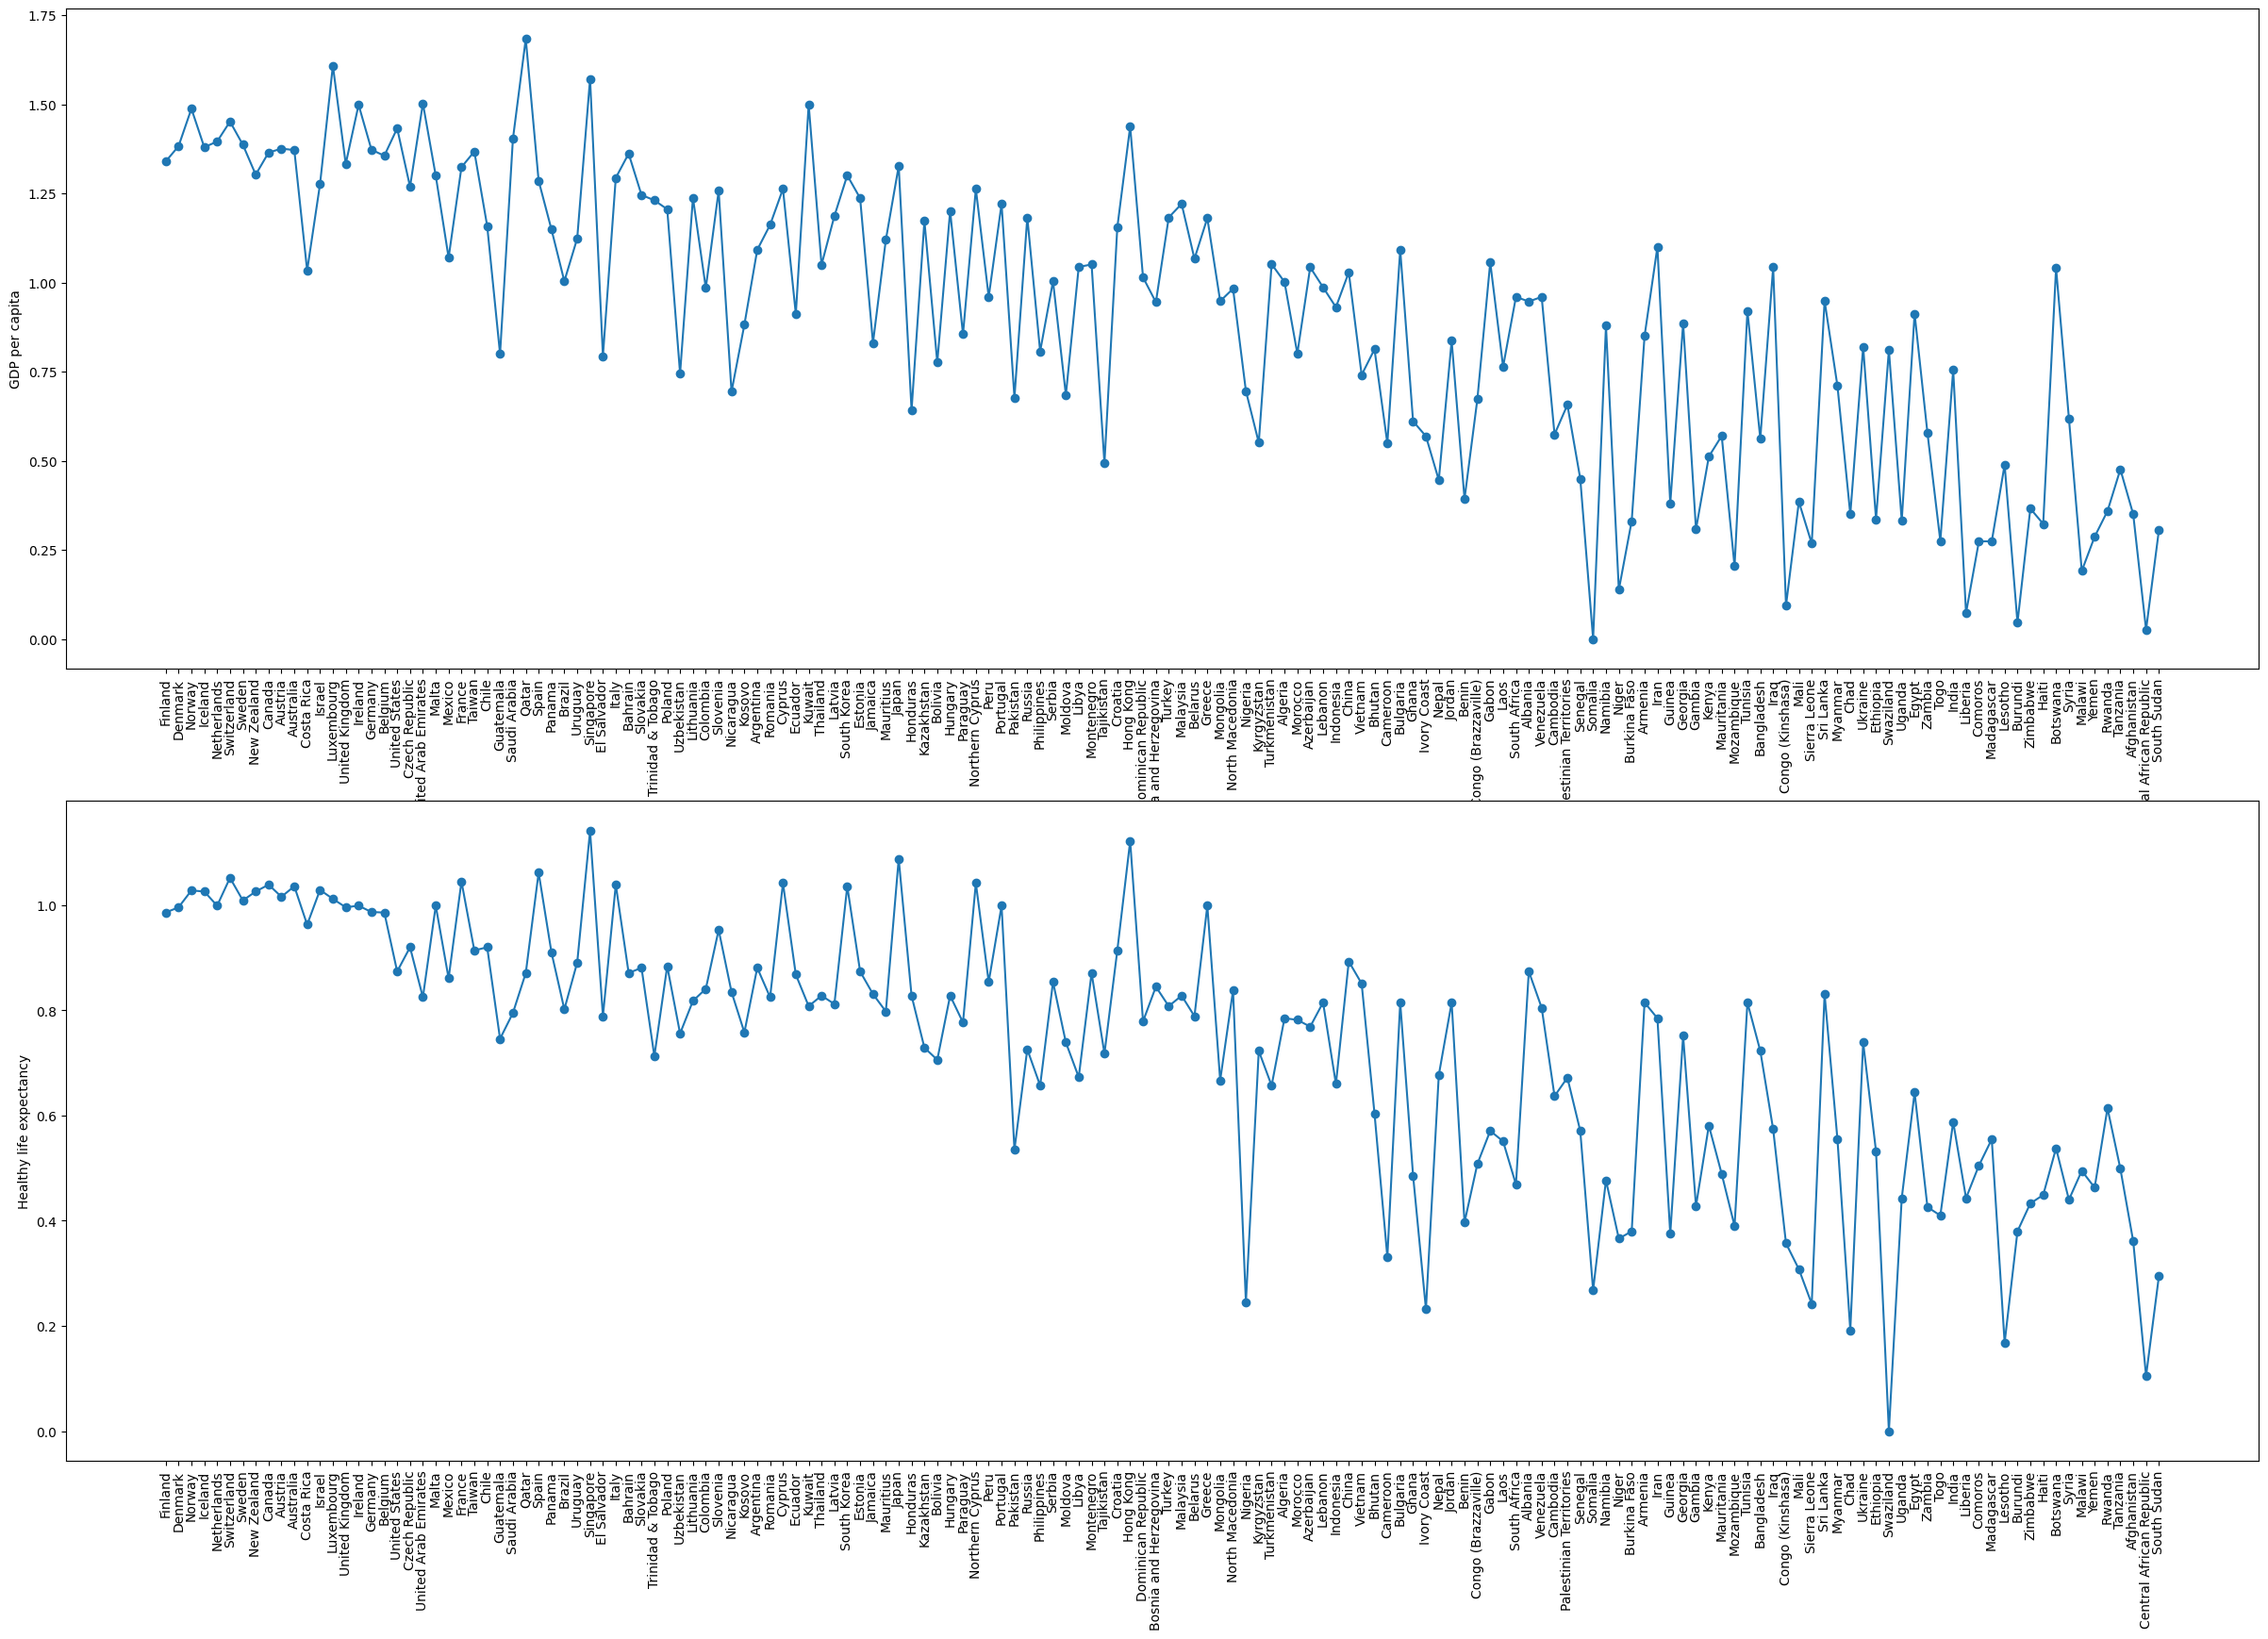

In [158]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(30,20))
ax1.plot(df["Country or region"], df["GDP per capita"], marker = 'o')
ax1.set_ylabel("GDP per capita")
ax1.tick_params(axis='x', rotation=90)
ax2.plot(df["Country or region"], df["Healthy life expectancy"], marker = 'o')
ax2.set_ylabel("Healthy life expectancy")
ax2.tick_params(axis='x', rotation = 90)
plt.show()

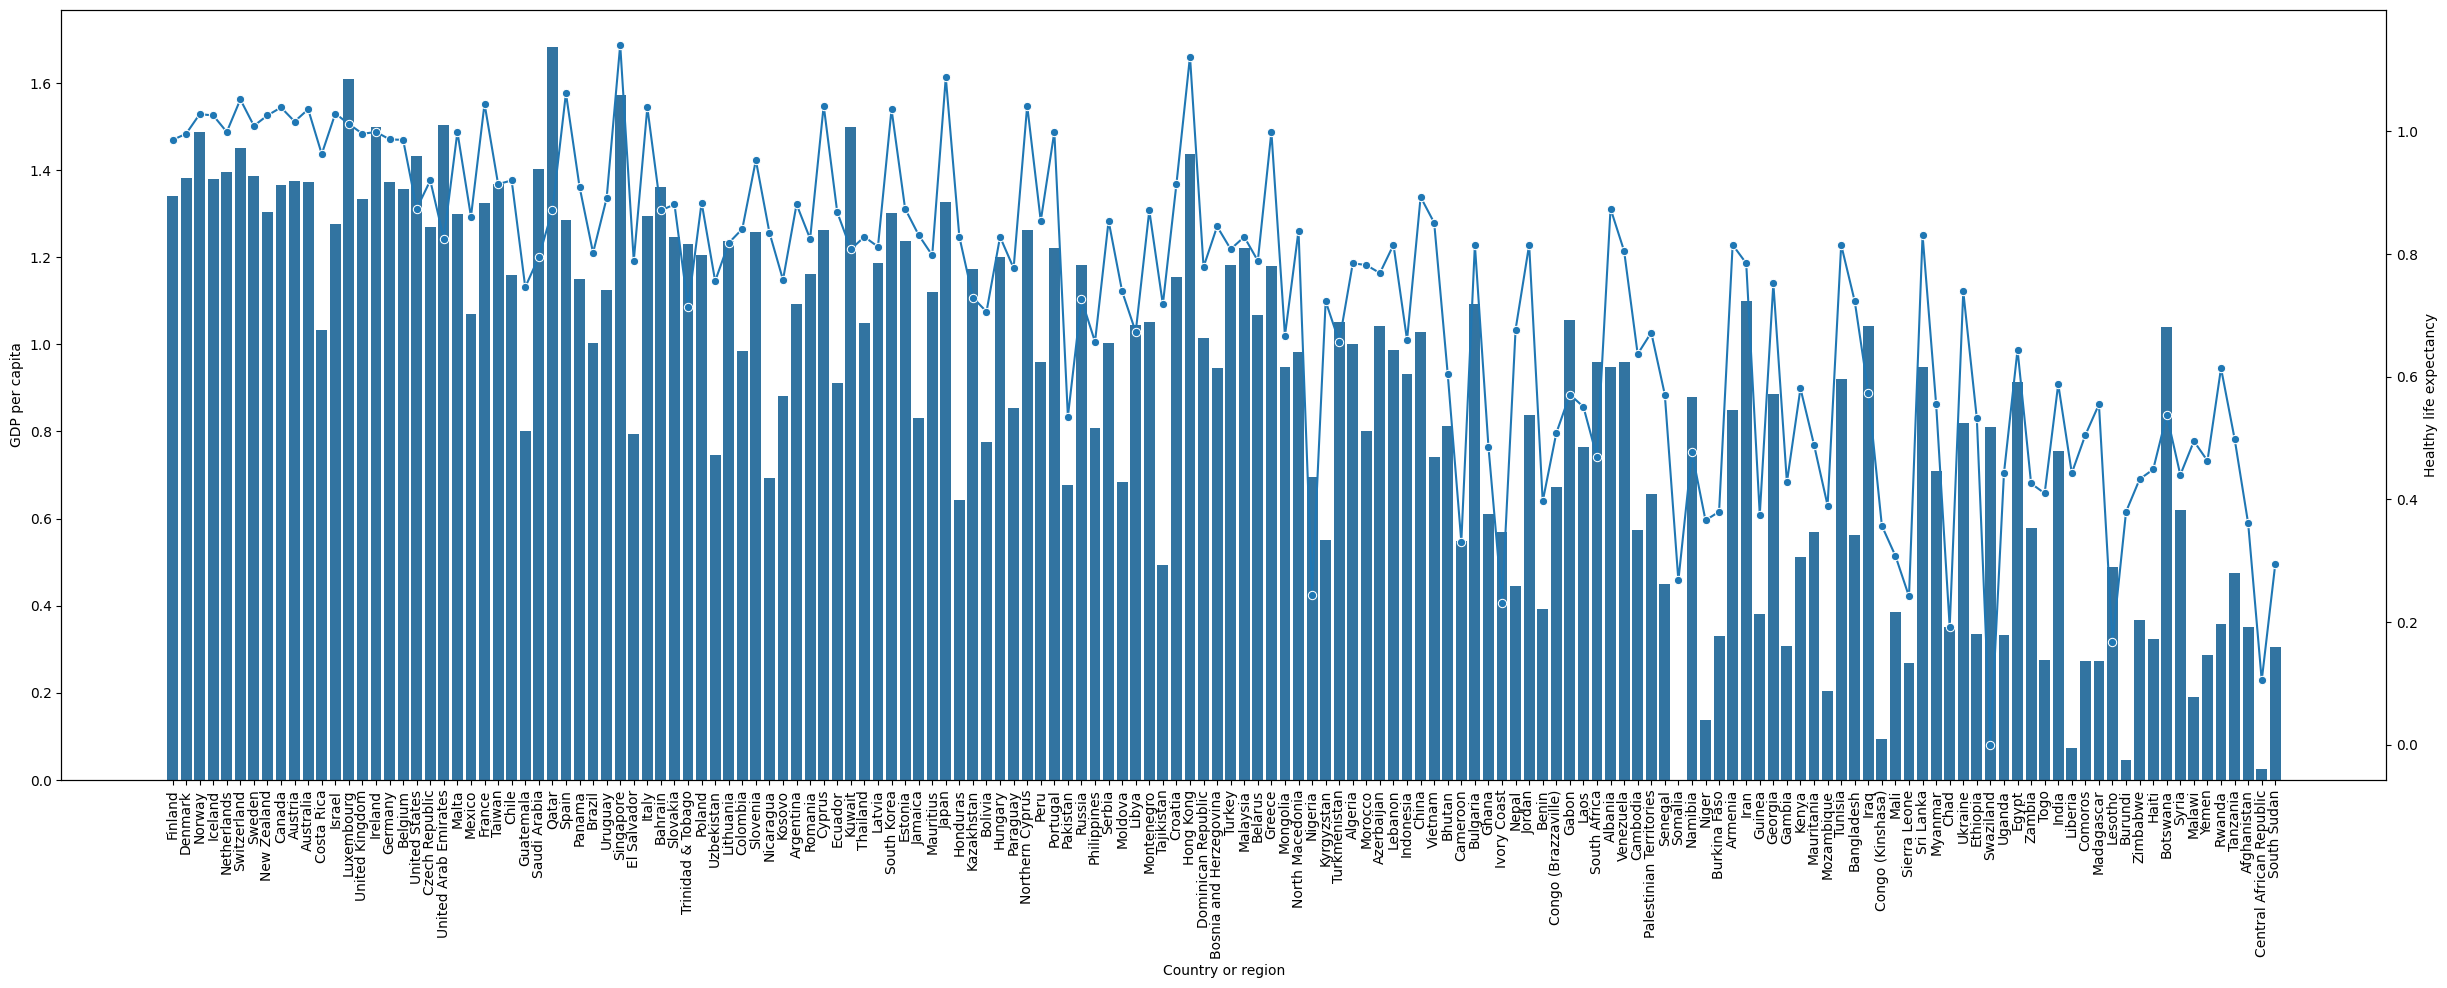

In [159]:
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(30,10))
sns.barplot(x=df["Country or region"], y=df["GDP per capita"], ax=ax1)
ax1.set_ylabel("GDP per capita")
ax1.tick_params(axis='x', rotation=90)
ax2 = ax1.twinx()
sns.lineplot(x=df["Country or region"], y=df["Healthy life expectancy"], ax=ax2, marker = 'o')
ax2.set_ylabel("Healthy life expectancy")
ax2.tick_params(axis='x', rotation = 90)
plt.show()